# Project Title: [EMAIL SPAM CLASSIFICATION]


In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')



#DATA PREPROCESSING BEGINS..

In [3]:
df.shape



(5572, 5)

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head(5)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1': 'output'}, inplace=True)
df.rename(columns={'v2': 'msg'}, inplace=True)

Encoding the o/p label

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['output']=encoder.fit_transform(df['output'])

In [12]:
df.head(5)

,output,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#mising values
df.isnull().sum()


output    0
msg       0
dtype: int64

In [14]:
#checking for duplicate values
df.duplicated().sum()


np.int64(403)

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
#Exploratory Data Analysis

In [18]:
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

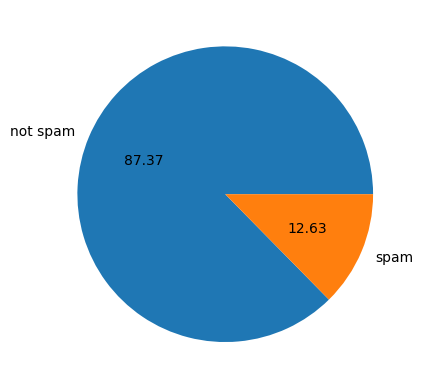

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['output'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [21]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['numcharacters']=df['msg'].apply(len)
#countingf the number of characters in each message

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12716\2468144073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numcharacters']=df['msg'].apply(len)


In [27]:
df.head

<bound method NDFrame.head of       output                                                msg  numcharacters
0          0  Go until jurong point, crazy.. Available only ...            111
1          0                      Ok lar... Joking wif u oni...             29
2          1  Free entry in 2 a wkly comp to win FA Cup fina...            155
3          0  U dun say so early hor... U c already then say...             49
4          0  Nah I don't think he goes to usf, he lives aro...             61
...      ...                                                ...            ...
5567       1  This is the 2nd time we have tried 2 contact u...            161
5568       0              Will Ì_ b going to esplanade fr home?             37
5569       0  Pity, * was in mood for that. So...any other s...             57
5570       0  The guy did some bitching but I acted like i'd...            125
5571       0                         Rofl. Its true to its name             26

[5169 rows x 3 column

In [39]:

import spacy
nlp = spacy.load('en_core_web_sm')
df['word'] = df['msg'].apply(lambda x: len(str(x).split()))



In [40]:
df.head()

,output,msg,numcharacters,word
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [ ]:
def count_sentences(text):
    doc = nlp(str(text))  
    return len(list(doc.sents))

# Counting the number of sentences in each message
df['numsent'] = df['msg'].apply(count_sentences)

In [42]:
df.head()


,output,msg,numcharacters,word,numsent
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [43]:
df[['numcharacters','word','numsent']].describe()

,numcharacters,word,numsent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.100987
std,58.236293,11.068488,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,27.000000


In [44]:
df[df['output']==0][['numcharacters','word','numsent']].describe()

,numcharacters,word,numsent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.961913
std,56.358207,11.116240,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,27.000000


In [46]:
df[df['output']==1][['numcharacters','word','numsent']].describe()

,numcharacters,word,numsent
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.062787
std,30.137753,5.967672,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [47]:
#plotting histogram
import seaborn as sns

<Axes: xlabel='numcharacters', ylabel='Count'>

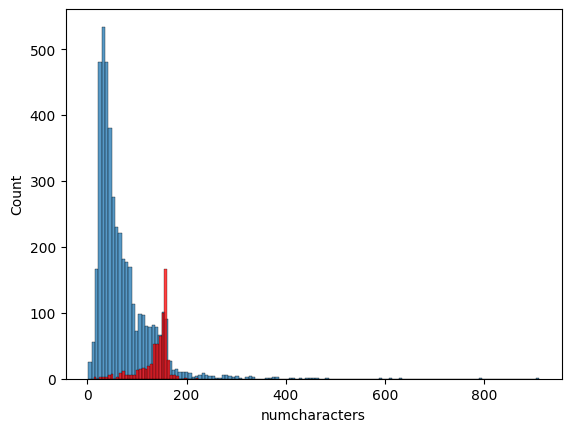

In [49]:
sns.histplot(df[df['output']==0]['numcharacters'])
sns.histplot(df[df['output']==1]['numcharacters'],color='red')

<Axes: xlabel='word', ylabel='Count'>

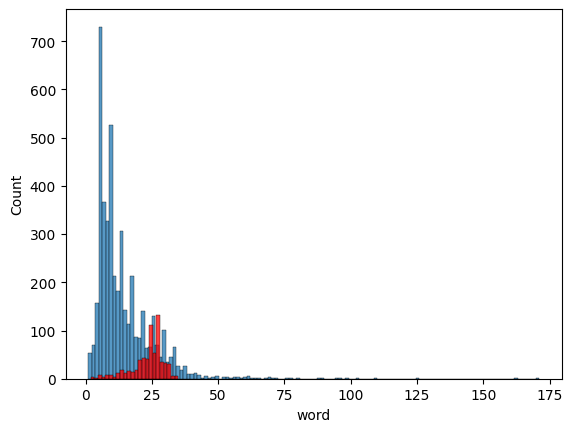

In [51]:
sns.histplot(df[df['output']==0]['word'])
sns.histplot(df[df['output']==1]['word'],color='red')

<Axes: xlabel='numsent', ylabel='Count'>

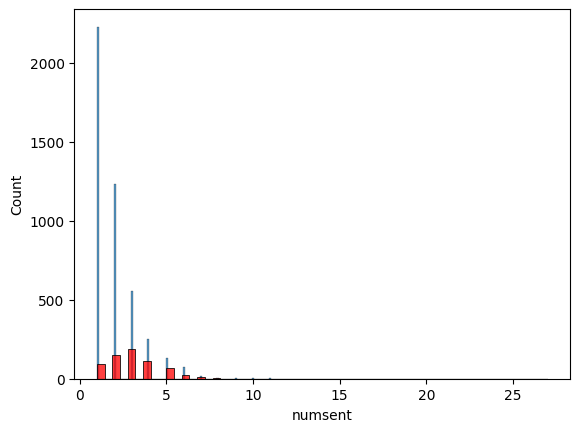

In [52]:
sns.histplot(df[df['output']==0]['numsent'])
sns.histplot(df[df['output']==1]['numsent'],color='red')

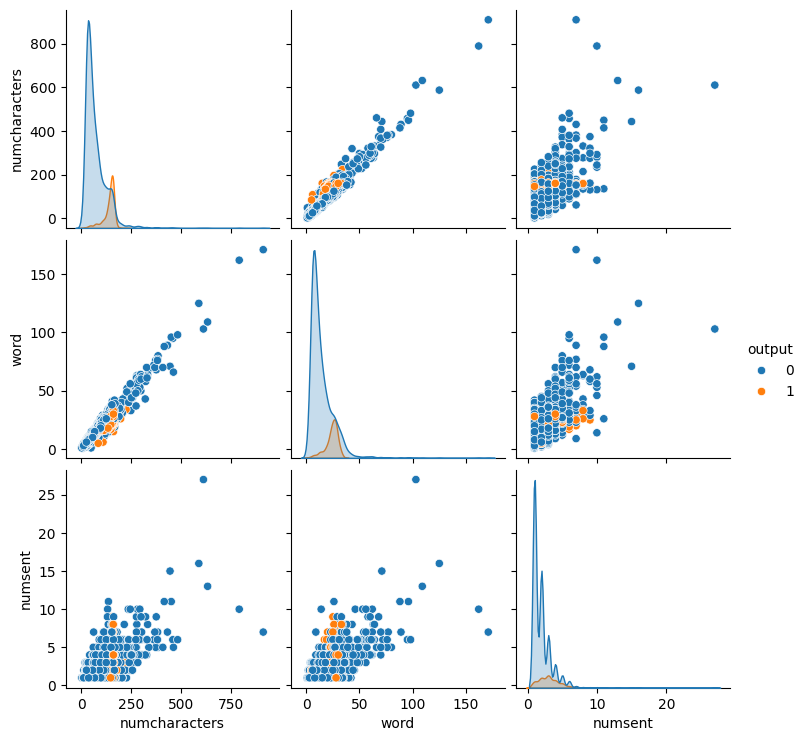

In [53]:
#analyse relation between columns
sns.pairplot(df,hue='output')

In [54]:
###  preprocessing steps
#lowercase
#tokenisation
#removing spl char
#removingstop words and punctuation
#steming

In [67]:
from textblob import TextBlob

import string



def transform_text_spacy(text):
    # spelling correction
    corrected = str(TextBlob(text).correct())


    doc = nlp(corrected.lower()) #lowecase conversion

    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop and token.text not in string.punctuation:# removing punctuation and stop words
                        tokens.append(token.lemma_)# lemmatization
    
    return " ".join(tokens)


In [58]:
import string 
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
transform_text_spacy("hey its urgent call me asap")

'hey urgent sap'

In [69]:
df['msg']=df['msg'].apply(transform_text_spacy)

In [71]:
df.head()

,output,msg,numcharacters,word,numsent
0,0,point crazy available boris n great world la e...,111,20,3
1,0,k war joke u,29,6,2
2,1,free entry wily come win final receive entry t...,155,28,2
3,0,u dun early u c,49,11,2
4,0,ah think go live,61,13,1


In [ ]:
pip install wordcloud

In [74]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [80]:
spam_wc=wc.generate(df[df['output']==1]['msg'].str.cat(sep=""))
print(len(spam_wc.words_))

plt.figure(figsize=(10,5))

200


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

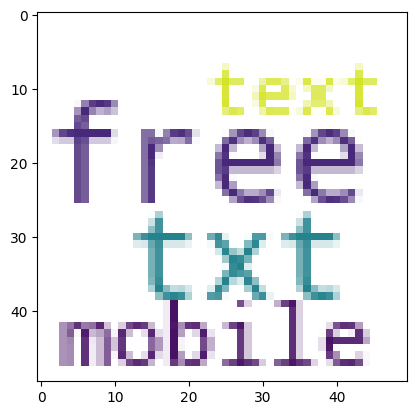

In [81]:
plt.imshow(spam_wc)

In [85]:
ham_wc=wc.generate(df[df['output']==0]['msg'].str.cat(sep=""))
print(len(ham_wc.words_))


200


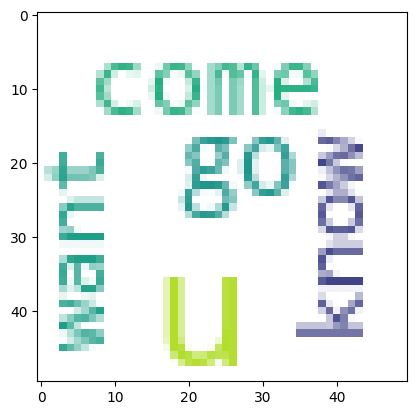

In [86]:
plt.imshow(ham_wc)

In [ ]:
df[df['output']==1]['msg'].tolist()

#transforming series of meessages into lists


In [ ]:
spam_corpus=[]
for msg in df[df['output']==1]['msg'].tolist():
    print(msg)
    for word in msg.split():
        spam_corpus.append(word)

In [89]:
len(spam_corpus)

7143

#creating dictionary and count of words  as key value pair

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)



[('free', 195),
 ('txt', 139),
 ('u', 117),
 ('mobile', 115),
 ('stop', 106),
 ('reply', 105),
 ('claim', 98),
 ('win', 94),
 ('text', 92),
 ('prize', 82),
 ('new', 67),
 ('service', 65),
 ('cash', 62),
 ('urgent', 57),
 ('week', 55),
 ('send', 55),
 ('award', 55),
 ('tone', 55),
 ('contact', 51),
 ('end', 43),
 ('phone', 43),
 ('customer', 42),
 ('message', 41),
 ('foka', 39),
 ('day', 38),
 ('late', 36),
 ('guarantee', 36),
 ('number', 35),
 ('try', 34),
 ('meet', 34)]

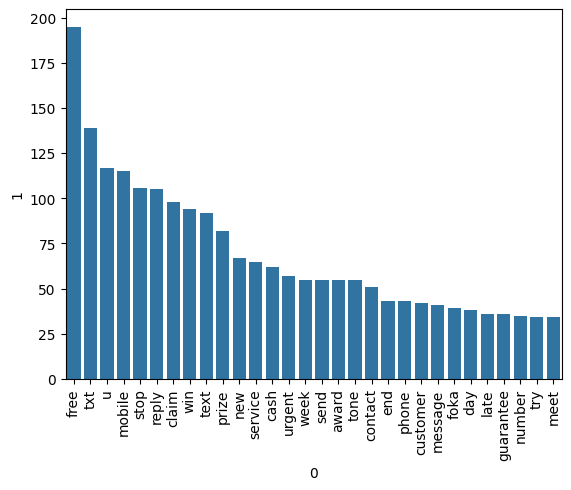

In [91]:
pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [92]:
hpam_corpus=[]
for msg in df[df['output']==0]['msg'].tolist():
    
    for word in msg.split():
        hpam_corpus.append(word)

In [93]:
len(hpam_corpus)

27373

In [94]:
###model building using naive base algorithm 


In [95]:
#text vectorization 
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [96]:
X=cv.fit_transform(df['msg']).toarray()

In [97]:
X.shape


(5169, 4730)

In [98]:
Y=df['output'].values

In [99]:
Y


array([0, 0, 1, ..., 0, 0, 0])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

USING THREE NAIVE BAYES ALGO FOR COMPARITIVE STUDY

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [104]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))



0.8085106382978723
[[726 170]
 [ 28 110]]
0.39285714285714285


In [105]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))


0.9671179883945842
[[876  20]
 [ 14 124]]
0.8611111111111112


In [106]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))


0.9642166344294004
[[889   7]
 [ 30 108]]
0.9391304347826087


In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf=TfidfVectorizer()

In [110]:
X=tfidf.fit_transform(df['msg']).toarray()

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [112]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [113]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))



0.8085106382978723
[[726 170]
 [ 28 110]]
0.39285714285714285


In [114]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9574468085106383
[[896   0]
 [ 44  94]]
1.0


In [115]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9642166344294004
[[889   7]
 [ 30 108]]
0.9391304347826087


In [88]:
# since precison matters more than accuracy we will go with mnb